In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def valid_state(fox, hen, corn, farmer):
    return not ((hen != farmer and fox == hen) or (hen != farmer and hen == corn))

def all_moves(fox, hen, corn, farmer):
    dst = 'H' if farmer == 'M' else 'M'
    if fox == farmer: yield(dst, hen, corn, dst)
    if hen == farmer: yield(fox, dst, corn, dst)
    if corn == farmer: yield(fox, hen, dst, dst)
    yield(fox, hen, corn, dst)

def node_name(fox, hen, corn, farmer):
    return fox + hen + corn + farmer


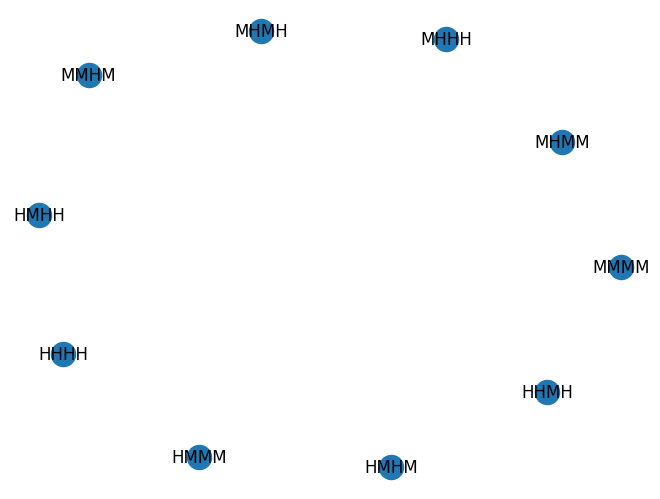

In [3]:
# states defined in order fox,hen,corn,farmer -- as
G = nx.DiGraph()
G.add_nodes_from(node_name(fox, hen, corn, farmer)
                 for fox in "HM" for hen in "HM" for corn in "HM" for farmer in "HM"
                 if valid_state(fox,hen,corn,farmer))
nx.draw(G, with_labels=True)

In [4]:
for S in G.nodes:
    for fox,hen,corn,farmer in all_moves(S):
        nxt = node_name(fox, hen, corn, farmer)
        if nxt in G.nodes:
            G.add_edge(S,nxt)
            
nx.draw(G, with_labels=True)

TypeError: all_moves() missing 3 required positional arguments: 'hen', 'corn', and 'farmer'

In [ ]:
nx.shortest_path(G,"HHHH","MMMM")

['HHHH', 'HMHM', 'HMHH', 'MMHM', 'MHHH', 'MHMM', 'MHMH', 'MMMM']